In [7]:
path = r'C:\Users\user\Desktop\NLP'

In [8]:
import os
import pickle
import warnings
warnings.filterwarnings('ignore')

In [9]:
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

'''Using NLTK would have been interesting because it has some good pre-process functions like Stemming/Lemming. But in the case
of spam detection, Upper/Lower case are important because some SPAM are written in CAPSLOCK.'''

'Using NLTK would have been interesting because it has some good pre-process functions like Stemming/Lemming. But in the case\nof spam detection, Upper/Lower case are important because some SPAM are written in CAPSLOCK.'

In [10]:
import numpy as np
import pandas as pd

import json

import matplotlib.pyplot as plt

import keras

from sklearn.model_selection import train_test_split

In [11]:
from functions import plot_history

In [12]:
with open('XY.data', 'rb') as f:
    sentences_train, sentences_test, y_train, y_test = pickle.load(f)
    
sentences_train.shape, sentences_test.shape

((4179,), (1393,))

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words = 'english')
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [14]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(20, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', # Binary Classification SPAM/HAM
              optimizer='adam',           # Adam optimization algorithm is an extension to stochastic gradient
              metrics=['accuracy'])       # Metrics we want to maximize
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                143780    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 143,801
Trainable params: 143,801
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_test, y_test), # As we have a little dataset, our validation is our test set
                    batch_size=100)                    # Little dataset, we can keep a low batch-size
model.save('model.BOW')

Train on 4179 samples, validate on 1393 samples
Epoch 1/50
4179/4179 [==============================] - 1s 126us/step - loss: 0.6218 - accuracy: 0.8887 - val_loss: 0.5330 - val_accuracy: 0.9734
Epoch 2/50
4179/4179 [==============================] - 0s 87us/step - loss: 0.4375 - accuracy: 0.9866 - val_loss: 0.3766 - val_accuracy: 0.9792
Epoch 3/50
4179/4179 [==============================] - 0s 88us/step - loss: 0.2967 - accuracy: 0.9914 - val_loss: 0.2719 - val_accuracy: 0.9799
Epoch 4/50
4179/4179 [==============================] - 0s 95us/step - loss: 0.2061 - accuracy: 0.9935 - val_loss: 0.2069 - val_accuracy: 0.9806
Epoch 5/50
4179/4179 [==============================] - 0s 93us/step - loss: 0.1491 - accuracy: 0.9943 - val_loss: 0.1655 - val_accuracy: 0.9806
Epoch 6/50
4179/4179 [==============================] - 0s 88us/step - loss: 0.1118 - accuracy: 0.9959 - val_loss: 0.1387 - val_accuracy: 0.9806
Epoch 7/50
4179/4179 [==============================] - 0s 90us/step - loss: 0.08

In [16]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.9770


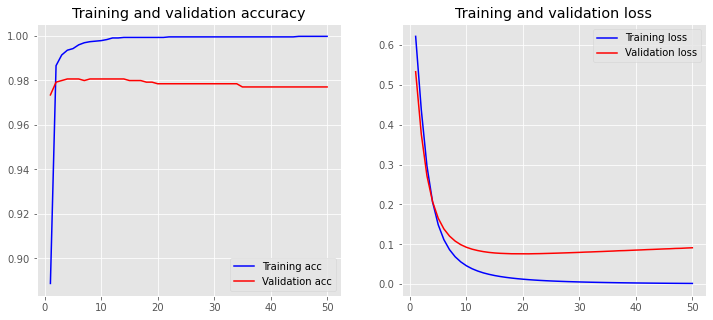

In [17]:
plot_history(history)

# **Testing with our Emails**

In [18]:
modelBOW = keras.models.load_model('model.BOW')

In [19]:
test = ["Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed £1000 cash or £5000 prize!"]

test_tok  = vectorizer.transform(test)
sentiment = modelBOW.predict(test_tok,batch_size=1,verbose = 2)[0]

if sentiment > 0.5:
    label = "SPAM"
else:
    label = "HAM"

print(label, sentiment, test) 

SPAM [0.99999917] ['Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed £1000 cash or £5000 prize!']
